# Dog Breed Prediction
## https://www.kaggle.com/c/dog-breed-identification/overview
### CS 4662
### Spring 2020
### Alan Garcia
### Ryan Peralta


In [1]:
import PIL.Image
from numpy import asarray
from PIL import Image
from numpy import fliplr
from numpy import flipud

import plaidml.keras
plaidml.keras.install_backend()

#from tensorflow.keras import backend
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.image as mpimg

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
'''
import os
counter = 0
d = d = "C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/train"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        print(full_path)
        img = Image.open(full_path)
        maxsize = (32, 32)
        img = img.resize(maxsize, PIL.Image.ANTIALIAS)
        img.save('resized_photos32_RGB/'+ str(counter) + '.jpg')
        counter += 1
'''

'\nimport os\ncounter = 0\nd = d = "C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/train"\nfor path in os.listdir(d):\n    full_path = os.path.join(d, path)\n    if os.path.isfile(full_path):\n        print(full_path)\n        img = Image.open(full_path)\n        maxsize = (32, 32)\n        img = img.resize(maxsize, PIL.Image.ANTIALIAS)\n        img.save(\'resized_photos32_RGB/\'+ str(counter) + \'.jpg\')\n        counter += 1\n'

#### Adding another image, flipped vertically

In [3]:
listForX = []
listForFlipX = []
listForFlipY = []
for x in range(0, 10222):
    test = mpimg.imread("C:/Users/rpera/Desktop/Spring 2020/CS 4662/CS4662-Project/resized_photos32_RGB/"+str(x)+".jpg")
    testing = (test.reshape(1, 3072))
    testFlip = fliplr(test)
    testFlip2 = flipud(test)
    
    testingFlip = (testFlip.reshape(1, 3072))
    testingFlip = (testFlip.reshape(1, 3072))
    listForFlipX.append(testingFlip[0])
    listForFlipY.append(testingFlip[0])
    listForX.append(testing[0])

In [4]:
listForFlipX[0]

array([207, 158,  91, ..., 183, 127,  94], dtype=uint8)

In [5]:
listForFlipY[0]

array([207, 158,  91, ..., 183, 127,  94], dtype=uint8)

In [6]:
listForX[0]

array([151, 141,  69, ..., 169, 105,  80], dtype=uint8)

In [7]:
X = np.concatenate((listForX, listForFlipX, listForFlipY), axis=0)

In [8]:
X

array([[151, 141,  69, ..., 169, 105,  80],
       [ 78,  38,   0, ...,  47,  26,   0],
       [101, 103,  89, ..., 115, 111, 108],
       ...,
       [  0,   2,   1, ..., 230, 244, 253],
       [103, 107, 108, ..., 203, 149, 115],
       [117, 113, 114, ..., 211, 211, 211]], dtype=uint8)

In [9]:
#df = pd.DataFrame(listForX)

In [10]:
#df.values.tolist()

In [11]:
#X = np.asarray(listForX).concat(np.asarray(listForFlipX))

In [12]:
X.shape

(30666, 3072)

In [13]:
y = pd.read_csv("C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/labels.csv")

In [14]:
#y

In [15]:
y = y.drop(['id'], axis=1)

In [16]:
y['breed'] = pd.factorize(y['breed'])[0]

In [17]:
#y

In [18]:
y = y.breed.tolist() + y.breed.tolist()+ y.breed.tolist()

In [19]:
len(y)

30666

In [20]:
#yTest = []
#for x in range(0, 1000):
   # yTest.append(y[x])


In [21]:
#y = yTest

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [23]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [24]:
y_train = np_utils.to_categorical(y_train, 120)
y_test = np_utils.to_categorical(y_test, 120)

In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
X_train.shape

(24532, 32, 32, 3)

In [27]:
model = Sequential()

In [28]:
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25)) 
print(model.output_shape) # -> (None, 26, 26, 32)

INFO:plaidml:Opening device "opencl_amd_hawaii.0"


(None, 15, 15, 16)


In [29]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25)) 


model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 2, 2, 64)


In [30]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
print(model.output_shape)

(None, 256)
(None, 128)
(None, 120)


In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0         
__________

In [33]:
X_train.shape

(24532, 32, 32, 3)

In [34]:
y_train.shape

(24532, 120)

In [40]:
from keras.callbacks import EarlyStopping

fitted_model = model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=50, shuffle=True, verbose=1)

Train on 22078 samples, validate on 2454 samples
Epoch 1/50
22078/22078 [==============================] - 5s 229us/step - loss: 3.2715 - acc: 0.1922 - val_loss: 3.3494 - val_acc: 0.1997
Epoch 2/50
22078/22078 [==============================] - 5s 233us/step - loss: 3.2462 - acc: 0.1976 - val_loss: 3.3448 - val_acc: 0.2058
Epoch 3/50
22078/22078 [==============================] - 5s 230us/step - loss: 3.2558 - acc: 0.1910 - val_loss: 3.3541 - val_acc: 0.1911
Epoch 4/50
22078/22078 [==============================] - 5s 230us/step - loss: 3.2388 - acc: 0.1960 - val_loss: 3.3495 - val_acc: 0.2005
Epoch 5/50
22078/22078 [==============================] - 5s 228us/step - loss: 3.2351 - acc: 0.1966 - val_loss: 3.3321 - val_acc: 0.1932
Epoch 6/50
22078/22078 [==============================] - 5s 230us/step - loss: 3.2370 - acc: 0.1963 - val_loss: 3.3406 - val_acc: 0.1976
Epoch 7/50
22078/22078 [==============================] - 5s 228us/step - loss: 3.2083 - acc: 0.2019 - val_loss: 3.3201 - v

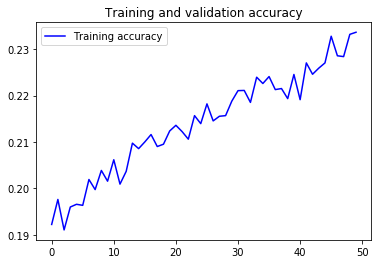

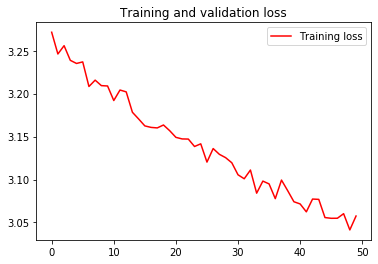

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = fitted_model.history['acc']
#val_accuracy = history.history['val_acc']
loss = fitted_model.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [42]:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)

6134/6134 [==============================] - 1s 110us/step
(6134, 120)


In [43]:
#y_pridict

In [44]:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

6134/6134 [==============================] - 1s 159us/step
The accuracy is:  0.2314965764785147
